<a href="https://colab.research.google.com/github/Rauloigs/Fin-Technical-Analysis/blob/main/portafolio_eficiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Call the module to do import
%load_ext autoreload
%autoreload 2
%matplotlib inline

# What's still missing?

1. I want to see color in the covariance matrix to identifie uncorrelated assets.
2. Re-study formulas of each parameter
3. shinear más las visualizaciones
4. Revisar por el el Weatlh y Drawdown no generan un diferencial

### Para la Clase
1. El Expected Shortfall: promedio para un evento extremo cuanto vas a perder. Para ese 5% de las veces cuanto vas a perder en promedio.
2. El qqplot, que es una representación de que tan fuera de lo normal esta un activo. Entre más se separa de la recta más desviado esta.

In [ ]:
# Set libraries to work woth sheets
import pandas as pd
import numpy as np
import rigs_risk_kit as rrk
# from scipy.optimize import minimize

## Get the stocks df
keep this csv updated monthly 🙌

In [ ]:
file_path = '../data/rets_equities_2.csv'
rets_equities_1 = pd.read_csv(file_path)
# Now you can work with your DataFrame 'df'
rets_equities_1.head()

,date,AMD,META,JPM,NFLX,GOOG,NVDA,IBE,WMT,NVO,CVX
0,10/03/22,-0.02038,-0.03893,-0.02252,-0.04611,-0.01658,-0.02471,0.01551,-0.00379,-0.03063,0.00047
1,11/03/22,-0.01956,-0.00522,0.00993,-0.02736,-0.02866,-0.03484,0.00407,0.01394,0.00474,-0.02446
2,14/03/22,0.06924,0.02893,0.01775,0.03849,0.02304,0.07689,-0.00101,0.01187,0.00708,-0.05062
3,15/03/22,0.05525,0.06041,0.04469,0.04009,0.03108,0.06661,-0.00812,-0.00288,0.03689,-0.00360
4,16/03/22,-0.03190,0.02067,0.01264,0.03879,0.00681,0.01102,0.00409,-0.00227,0.03407,0.01731


In [ ]:
rets = rrk.get_tab_rets(rets_equities_1)
# Use to decide the range
rets = rets['2024-07-01':]
rets.head(5)

,AMD,META,JPM,NFLX,GOOG,NVDA,IBE,WMT,NVO,CVX
date,,,,,,,,,,
2024-07-01,0.04198,0.00955,0.01645,0.00886,0.01149,-0.01311,-0.01401,0.00874,-0.01678,0.00147
2024-07-02,-0.00250,0.00090,-0.00067,0.00431,0.00418,0.04573,0.01087,0.00250,-0.02875,-0.00026
2024-07-03,0.04881,0.05873,-0.01869,0.01193,0.02439,-0.01910,-0.00827,0.02638,0.02520,-0.01531
2024-07-05,0.03950,-0.01961,0.00186,-0.00711,-0.00771,0.01883,0.01418,-0.00514,0.00492,0.00013
2024-07-08,-0.00890,0.00128,0.01199,0.00000,-0.00021,0.02480,0.00164,0.00316,-0.01845,-0.00875


## Define inputs
- er (Expected Returns)
- cov (Covariance Matrix)
- different portfolios

In [ ]:
# er = rrk.annualize_rets(rets['2023-05-21':], 252)
er = rrk.annualize_rets(rets, 252)
# Remeber annualizing values of the covariance by multiplying time 252 (daily trading)
cov = rets.cov()*252

In [ ]:
#
p_all=['AMD','META','JPM','NFLX','GOOG','NVDA','IBE','WMT','NVO','CVX']


# 1. Annualized Return & Volatility

<AxesSubplot:>

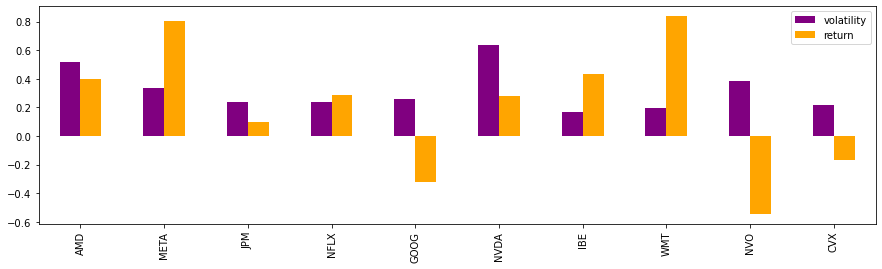

In [ ]:
annual_vol = rrk.annualize_vol(rets, 252)
a_return = pd.Series(er, name='return')
a_vol  = pd.Series(annual_vol, name='volatility')
vol_ret_df=pd.concat([a_vol,a_return],axis=1)
vol_ret_df.plot.bar(color=['purple', 'orange'], figsize=(15,4))

# 2. Covariance Matrix

Still unfinished: color cells and make it smaller

View Covariance Matrix in [technical_analysis_book ](https://https://docs.google.com/spreadsheets/d/1wyYmbaS5Md0YkaBph3enhz_Bou8mctJdEsyDA5ksYEk/edit?gid=633929030#gid=633929030)Sheets

In [ ]:
mat_cov = cov.loc[p_all, p_all]
# Export to sheets
#worksheet = gc.open("technical_analysis_book").get_worksheet(5)
#worksheet.update([mat_cov.columns.values.tolist()] + mat_cov.fillna(-1).values.tolist())

In [ ]:
# Specify the file path where you want to save the CSV
file_path_1 = '../finals/mat_cov_2.csv'

# Export the DataFrame to CSV
mat_cov.to_csv(file_path_1, index=False)

# 3. Drawdown and the Wealth Index
Considerations ✅:
- input the asset to be analyzed
- 2 graphics. 1st Wealth Index & Peaks, 2nd Drawdown

In [ ]:
# How do the Drawdown, Wealth, Peaks data looks like?
rrk.drawdown(rets['AMD']).head()

,Wealth,Peaks,Drawdown
date,,,
2024-07-01,1041.980000,1041.980000,0.0000
2024-07-02,1039.375050,1041.980000,-0.0025
2024-07-03,1090.106946,1090.106946,0.0000
2024-07-05,1133.166171,1133.166171,0.0000
2024-07-08,1123.080992,1133.166171,-0.0089


## Wealth & Drawdown

- choose a date or asset

<AxesSubplot:xlabel='date'>

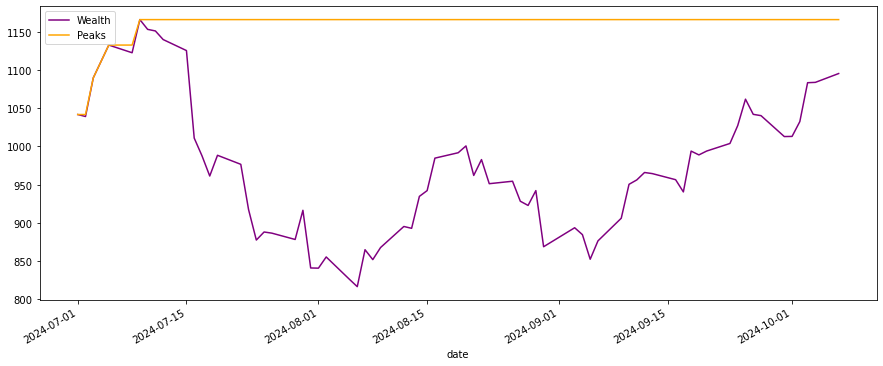

In [ ]:
## rrk.drawdown(rets['2021-05-21':]['GOOG'])[['Wealth', 'Peaks']].plot(figsize=(15, 6), color=['purple', 'orange'])
rrk.drawdown(rets['AMD'])[['Wealth', 'Peaks']].plot(figsize=(15, 6), color=['purple', 'orange'])

<AxesSubplot:xlabel='date'>

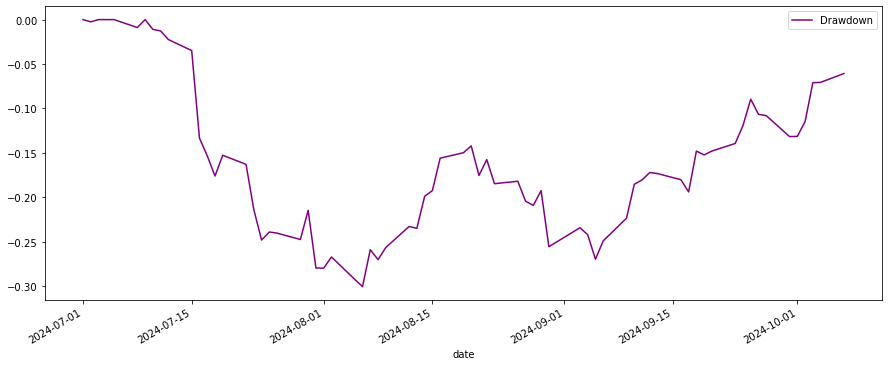

In [ ]:
## rrk.drawdown(rets['2021-05-21':]['GOOG'])[['Drawdown']].plot(figsize=(15,6), color='purple')
rrk.drawdown(rets['AMD'])[['Drawdown']].plot(figsize=(15,6), color='purple')

## Look for largest Drawdown & when did it happen?

In [ ]:
print("Max Drawdown was", rrk.drawdown(rets['AMD'])[['Drawdown']].min(), rrk.drawdown(rets['AMD'])[['Drawdown']].idxmin())

Max Drawdown was Drawdown   -0.300556
dtype: float64 Drawdown   2024-08-06
dtype: datetime64[ns]


# 4. Skewness, Kurtosis & Jarque Jarbera

## Skewness
If the skewness is between **-0.5 & 0.5**, the data are nearly symmetrical. If the skewness is between **-1 & -0.5** (negative skewed) or between **0.5 & 1**(positive skewed), the data are slightly skewed. If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode. Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

<AxesSubplot:>

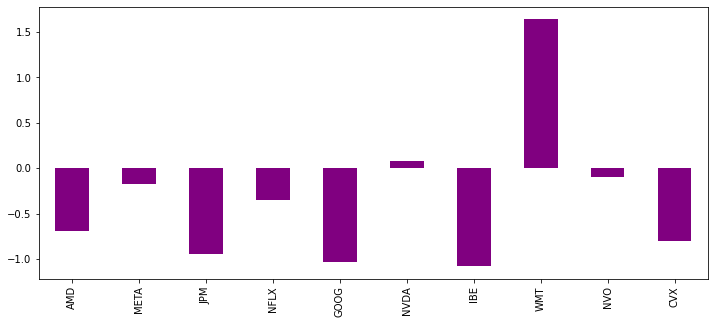

In [ ]:
rrk.skewness(rets).plot.bar(color = 'purple', figsize = (12, 5))

## Kurtosis
A positive value for the kurtosis indicates a distribution more peaked than normal. In contrast, a negative kurtosis indicates a shape flatter than normal. Analogous to the skewness, the general guideline is that if the kurtosis is greater than +2, the distribution is too peaked. Likewise, a kurtosis of less than −2 indicates a distribution that is too flat.

For investors, high kurtosis of the return distribution curve implies that there have been many price fluctuations in the past (positive or negative) away from the average returns for the investment. So, an investor might experience extreme price fluctuations with an investment with high kurtosis. This phenomenon is known as kurtosis risk.

<AxesSubplot:>

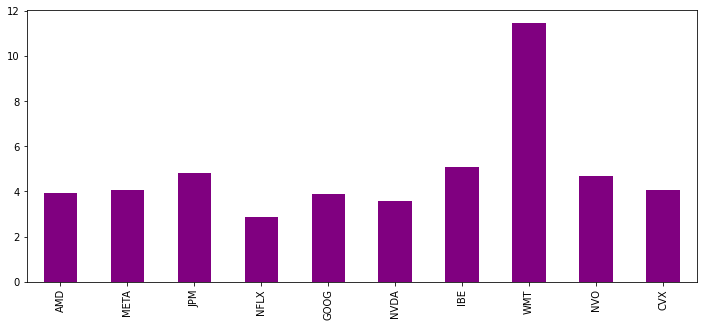

In [ ]:
rrk.kurtosis(rets).plot.bar(color = 'purple', figsize = (12, 5))

## Jarque Jarbera

In [ ]:
rrk.is_normal(rets['AMD'])

True

# 5. VaR Historic - non parametric method
(*With out estimating or assuming any other parameters rather than historic returns*)

VaR is typically defined as the maximum loss which should not be exceeded during a specific time period with a given probability level (or ‘confidence level’). Mathematically, the VaR corresponds to the quantile of the distribution of returns.

For instance, if we select a confidence level of 99%, then our VaR estimate corresponds to the 1st percentile of the probability distribution of daily returns (the top 1% of worst returns). In other words, there are 99% chances that we will not obtain a loss greater than our VaR estimate (for the 99% confidence level). Similarly, VaR for a 95% confidence level corresponds to top 5% of the worst returns.

## CVaR (*Historic*)
While VaR represents a worst-case loss associated with a probability and a time horizon, CVaR is the expected loss if that worst-case threshold is ever crossed. CVaR, in other words, quantifies the expected losses that occur beyond the VaR breakpoint.
- Conditional value at risk is derived from the value at risk for a portfolio or investment.
- The use of CVaR as opposed to just VaR tends to lead to a more conservative approach in terms of risk exposure.
- The choice between VaR and CVaR is not always clear, but volatile and engineered investments can benefit from CVaR as a check to the assumptions imposed by VaR.

The less stable the investment, the greater the chance that VaR will not give a full picture of the risks, as it is indifferent to anything beyond its own threshold.

<AxesSubplot:>

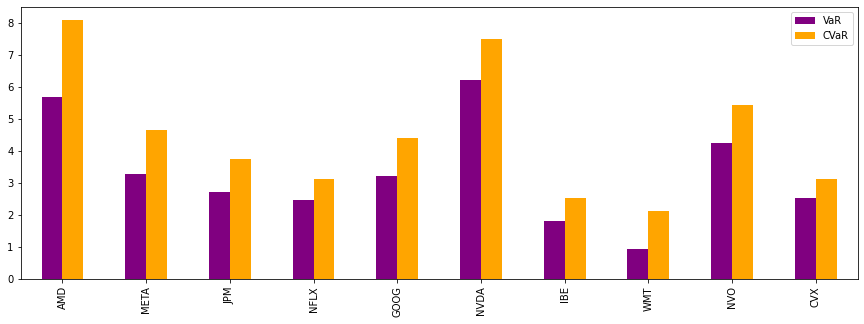

In [ ]:
var = pd.Series(rrk.var_gaussian(rets, modified=True)*100, name='VaR')
cvar  = pd.Series(rrk.cvar_historic(rets)*100, name='CVaR')
cvar_var_df=pd.concat([var,cvar],axis=1)
cvar_var_df.plot.bar(color=['purple', 'orange'], figsize=(15,5))

# 5.1 VaR Gaussian modified Cornish-Fisher
depending on Gaussian, Skewness and Kurtosis

<AxesSubplot:>

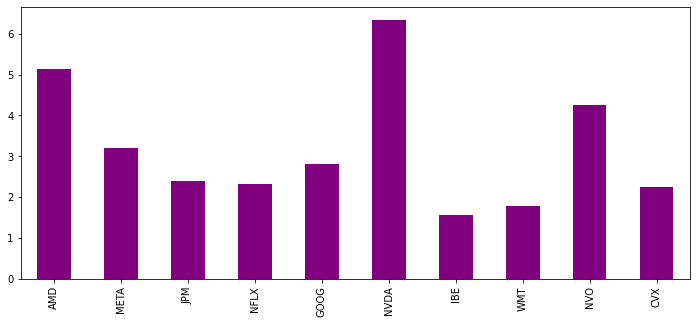

In [ ]:
(rrk.var_gaussian(rets, 5, modified=False)*100).plot.bar(color = 'purple', figsize = (12, 5))

# 6. Semideviation
Semi-deviation is an alternative measurement to standard deviation or variance. However, unlike those measures, semi-deviation looks only at negative price fluctuations. Thus, semi-deviation is most often used to evaluate the downside risk of an investment.

- Semi-deviation is an alternative to the standard deviation for measuring an asset's degree of risk.
- Semi-deviation measures only the below-mean, or negative, fluctuations in an asset's price.
- This measurement tool is most often used to evaluate risky investments.

<AxesSubplot:>

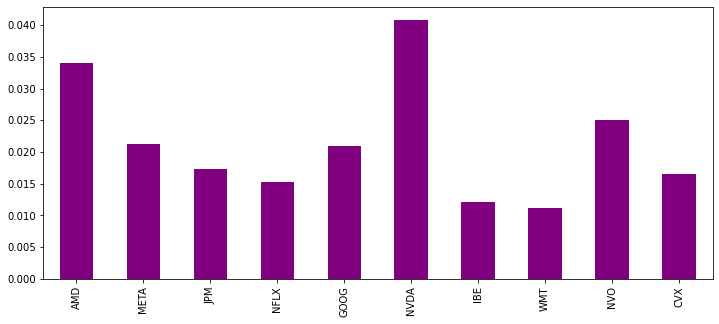

In [ ]:
rrk.semideviation3(rets).plot.bar(color = 'purple', figsize = (12, 5))

# 7. Summary of Stats

In [ ]:
rrk.summary_stats(rets[p_all], riskfree_rate=0.11)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
AMD,0.396659,0.517913,-0.697374,3.911932,0.056943,0.080940,0.498732,-0.300556
META,0.800882,0.336585,-0.177920,4.044864,0.032671,0.046525,1.850063,-0.160207
JPM,0.097526,0.236474,-0.945199,4.807949,0.027030,0.037457,-0.047592,-0.101302
NFLX,0.286786,0.236177,-0.346902,2.887045,0.024640,0.031165,0.674594,-0.133343
GOOG,-0.324480,0.259210,-1.039024,3.882247,0.032256,0.044128,-1.510580,-0.223798
NVDA,0.276390,0.633434,0.076375,3.561318,0.062091,0.075115,0.236604,-0.266844
IBE,0.434614,0.166474,-1.082872,5.076682,0.018175,0.025122,1.757485,-0.059438
WMT,0.837237,0.197068,1.639633,11.461501,0.009309,0.021075,3.326268,-0.058021
NVO,-0.545251,0.386384,-0.101079,4.680275,0.042443,0.054280,-1.528224,-0.195652
CVX,-0.169593,0.213086,-0.801430,4.054703,0.025158,0.031345,-1.182537,-0.148724


# 8. Plot the Efficient Frontier
**plot_rigs_ef()**
- rets_p : rets of the portfolio to be able to get volatility of each security and plot the scatter of secs.
- we can choose the portfolio we want to display.

**plot_rigs_ef_1()**
- you can display the different portfolios but you will always have all the securities in the scatter plot.
- Useful to select additional securities to the actual portfolio. You can choose to evaluate teh EF of the holdings porfolio but displaying all securities available. BECAUSE if there are stocks above the CAPM of the holding portfolio thos are undervalue and possible outperformers.
- un problema es que si filtro las rets ['2023-05-21':] en este no se filtran y se quedan con las vols y rets del main source - hay que arreglar eso

The Portfolios

<AxesSubplot:xlabel='Volatility'>

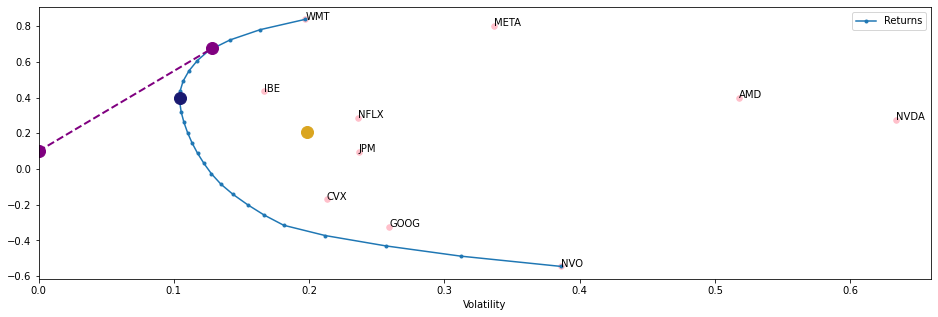

In [ ]:
rrk.plot_rigs_ef(rets, 25, er[p_all], cov.loc[p_all, p_all], show_cml=True, show_p=True, riskfree_rate=0.10, show_ew=True, show_gmv=True)

In [ ]:
# rrk.plot_rigs_ef_2(rigs_returns, 25, er[p_all], cov.loc[p_all, p_all], show_cml=True, show_p=True, riskfree_rate=0.11, show_ew=True, show_gmv=True)

# 9. Weights Analysis
- change the portfolio for the New Portfolio
- add the expected return
- get the weights of minimizing vol & weights to achive the msr

In [ ]:
value2 = input("New Portfolio analysis is:\n")
print("\n")
name_1 = str(value2)
value1 = input("Please enter Expected Return:\n")
print("\n")
e_ret = float(value1)
# For holding porfolio
weights10 = rrk.minimize_vol(e_ret, er[p_all], cov.loc[p_all, p_all])
volatility10 = rrk.portfolio_vol(weights10, cov.loc[p_all, p_all])*100
return10 = rrk.portfolio_return(weights10, er[p_all]).round(3)*100
# For new portfolio
weights20 = rrk.minimize_vol(e_ret, er[p_all], cov.loc[p_all, p_all])
volatility20 = rrk.portfolio_vol(weights20, cov.loc[p_all, p_all])*100
return20 = rrk.portfolio_return(weights20, er[p_all]).round(3)*100
# Results for holding portfolio
print('Introduced Expected Return:',return10, '%\n')
print('Holding Portfolio Minimized Vol:', volatility10.round(2), '%\n')
# Results for new portfolio
print('New Portfolio Minimized Vol :', volatility20.round(2), '%')

New Portfolio analysis is:
try


Please enter Expected Return:
0.15


Introduced Expected Return: 15.0 %

Holding Portfolio Minimized Vol: 11.32 %

New Portfolio Minimized Vol : 11.32 %


Determine optimal weights per asset

In [ ]:
# prepare this for the next cell
weights20 = weights20.round(2)*100
# Turn weights10 array into a list
list_1 = weights10.tolist()
# Show secs and w lists as a df
secs = pd.Series(p_all, name='secs')
weights = pd.Series(weights10.round(2)*100, name='weights %')
secs_weights=pd.concat([secs,weights],axis=1)
print("Weights expected to achive expected return of", return10, '% with the secs holding\n')
print('Sum of the weights is:', weights10.sum().round(2)*100, '%\n')
secs_weights

Weights expected to achive expected return of 15.0 % with the secs holding

Sum of the weights is: 100.0 %



,secs,weights %
0,AMD,0.0
1,META,0.0
2,JPM,0.0
3,NFLX,9.0
4,GOOG,10.0
5,NVDA,0.0
6,IBE,39.0
7,WMT,8.0
8,NVO,7.0
9,CVX,26.0


In [ ]:
# Turn weights10 array into a list
list_2 = weights20.tolist()
# Show secs and w lists as a df
secs_2 = pd.Series(p_all, name='secs')
weights20 = pd.Series(weights20, name='weights new p %')
secs_weights_new=pd.concat([secs_2,weights20],axis=1)
print("Weights expected to achive expected return of", return20, '% with the', name_1, 'portfolio secs\n')
print('Sum of the weights is:', weights20.sum(), '%\n')
secs_weights_new

Weights expected to achive expected return of 15.0 % with the try portfolio secs

Sum of the weights is: 99.0 %



,secs,weights new p %
0,AMD,0.0
1,META,0.0
2,JPM,0.0
3,NFLX,9.0
4,GOOG,10.0
5,NVDA,0.0
6,IBE,39.0
7,WMT,8.0
8,NVO,7.0
9,CVX,26.0


In [ ]:
# Optimal weights for a max sharpe ratio portfolio?
weights_msrp = rrk.msr(0.1, er[p_all], cov.loc[p_all, p_all]).round(5)*100
# Turn weights10 array into a list
list_2 = weights_msrp.tolist()
# Show secs and w lists as a df
secs_msr = pd.Series(p_all, name='secs')
weights_msr = pd.Series(weights_msrp.round(2), name='weights msr %')
secs_weights=pd.concat([secs_msr,weights_msr],axis=1)
secs_weights

,secs,weights msr %
0,AMD,0.00
1,META,13.29
2,JPM,0.00
3,NFLX,0.00
4,GOOG,0.00
5,NVDA,0.00
6,IBE,38.92
7,WMT,47.79
8,NVO,0.00
9,CVX,0.00


Realize that msr and minimize_vol functions will provide with the same weights if expected return on minimize_vol is precisely where the cml touches de efficient frontier.

# Minimized Vol Portfolio
## vol & ret expectations
If I would have used those weights of the **Minimized Portfolio** since the beginning of 2023 this would be my annualized volatility and return 😲

In [ ]:
# volatility of the portfolio with those weights already from 2000 and on for just the 2018 period.
p_vol10 = rrk.portfolio_vol(weights10, rets['2024-01-02':][p_all].cov())
# Annualized that volatility
annualized_vol10 = p_vol10*(252**0.5)
print('Volatility of the portfolio since "that date"', annualized_vol10.round(2)*100, '%')

Volatility of the portfolio since "that date" 11.0 %


In [ ]:
er10 = rrk.annualize_rets(rets['2024-01-02':], 252)
# volatility of the portfolio with those weights already from 2000 and on for just the 2018 period.
p_ret10 = rrk.portfolio_return(weights10, er10[p_all])
# Annualized that volatility
n_periods = rets['2023-01-02':].shape[0]
annualized_ret10 = p_ret10**(252/n_periods)
print('Total Return since then:', annualized_ret10.round(2)*100, '%')

Total Return since then: 0.0 %
